In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import math
import numpy as np
import random
from tqdm import tqdm , trange
import json
from pathlib import Path
from utils import *

In [2]:
mode = 'IR' #GRAY
root = f'orignal_rgba_glasses/{mode}'

glasses_paths = get_unfinished_glasses_path(root)
foot = get_foot_patch(root)

Number of unfinished glasses: 1


In [3]:
index = 0

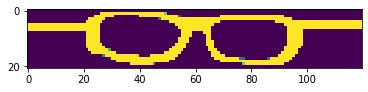

In [4]:
position = {
    'left':{
        'x_start':0,
        'x_end':8,
        'y_start':5,
        'y_end':8,
        },
    
    'right':{
        'x_start':31,
        'x_end':40,
        'y_start':4,
        'y_end':7,
        },
}

path = glasses_paths[index]
processed_glasses = read_img(path)
for direction in position.keys():
    for i in range(position[direction]['x_start'],position[direction]['x_end']):
        start_x = 3*i 
        end_x = start_x+3
        processed_glasses[position[direction]['y_start']:position[direction]['y_end'],start_x:end_x,:]=foot

plt.imshow(processed_glasses)
plt.show()
plt.imshow(processed_glasses[:,:,3])
plt.show()

In [5]:
output_path = path.replace('orignal_rgba_glasses','processed_glasses')
print(path)
print(output_path)

orignal_rgba_glasses/IR/5.png
processed_glasses/IR/5.png


In [6]:
os.makedirs(os.path.dirname(output_path),exist_ok=True)
cv2.imwrite(output_path,processed_glasses)

True

# check total

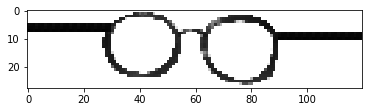

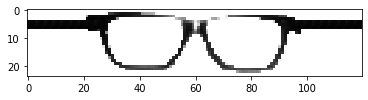

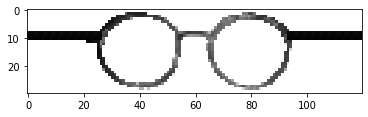

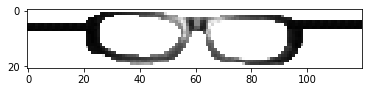

In [7]:
processed_root = root.replace('orignal_rgba_glasses','processed_glasses')
g_paths = [os.path.join(r, file) for r, dirs, files in os.walk(processed_root) for file in files if '.ipy' not in r]
g_paths.sort()

for k in range(len(g_paths)):
    glasses = cv2.imread(g_paths[k],cv2.IMREAD_UNCHANGED)
    plt.imshow(glasses)
    plt.show()